# Treinamento de modelo próprio para reconhecimento de texto manuscrito



# Importando as bibliotecas

In [ ]:
import tensorflow
tensorflow.__version__

'2.5.0'

In [ ]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Carregando as bases de dados

## Conjunto MNIST 0-9 

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
28 * 28

784

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
train_labels[0]

5

In [ ]:
digitos_data = np.vstack([train_data, test_data])
digitos_labels = np.hstack([train_labels, test_labels])

In [ ]:
digitos_data.shape

(70000, 28, 28)

In [ ]:
digitos_labels.shape

(70000,)

In [ ]:
digitos_labels

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [ ]:
np.random.randint(0, digitos_data.shape[0])

24742

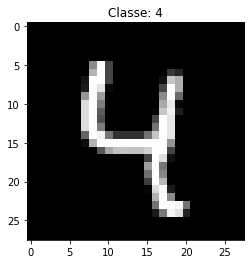

In [ ]:
indice = np.random.randint(0, digitos_data.shape[0])
plt.imshow(digitos_data[indice], cmap='gray')
plt.title('Classe: ' + str(digitos_labels[indice]));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


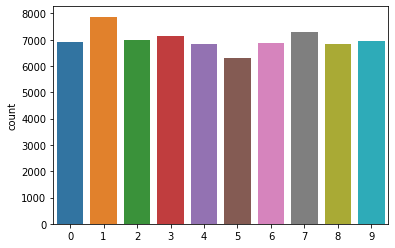

In [ ]:
sns.countplot(digitos_labels);

## Conjunto Kaggle A-Z

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2021-06-07 15:57:46--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 35.198.30.94
Connecting to iaexpert.academy (iaexpert.academy)|35.198.30.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  9.60MB/s    in 22s     

2021-06-07 15:58:11 (8.32 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
zip_object = zipfile.ZipFile(file='/content/alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
dataset_az = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')

In [ ]:
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
alfabeto_data = dataset_az.drop('0', axis = 1)
alfabeto_labels = dataset_az['0']

In [ ]:
alfabeto_data.shape, alfabeto_labels.shape

((372450, 784), (372450,))

In [ ]:
alfabeto_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [ ]:
alfabeto_data = np.reshape(alfabeto_data.values, (alfabeto_data.shape[0], 28, 28))

In [ ]:
alfabeto_data.shape

(372450, 28, 28)

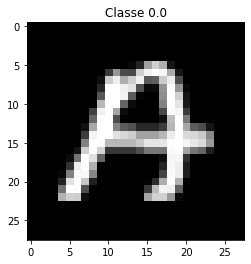

In [ ]:
indice = np.random.randint(0, alfabeto_data.shape[0])
plt.imshow(alfabeto_data[indice], cmap = 'gray')
plt.title('Classe ' + str(alfabeto_labels[indice]));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


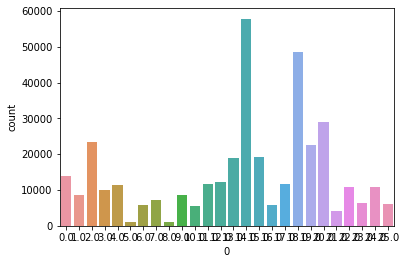

In [ ]:
sns.countplot(alfabeto_labels);

## Junção das bases de dados

In [ ]:
digitos_labels, np.unique(digitos_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
alfabeto_labels, np.unique(alfabeto_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [ ]:
alfabeto_labels += 10

In [ ]:
alfabeto_labels, np.unique(alfabeto_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [ ]:
data = np.vstack([alfabeto_data, digitos_data])
labels = np.hstack([alfabeto_labels, digitos_labels])

In [ ]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
data = np.array(data, dtype='float32')

In [ ]:
data.shape

(442450, 28, 28)

In [ ]:
data = np.expand_dims(data, axis = -1)

In [ ]:
data.shape

(442450, 28, 28, 1)

# Pré-processamento dos dados

In [ ]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [ ]:
data /= 255.0

In [ ]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
np.unique(labels)

array([0, 1])

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
labels[30000], len(labels[30000]), 26 + 10

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 36, 36)

In [ ]:
# OneHotEncoder
# A, B, C, Z
# 0, 1, 2, 25

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

In [ ]:
classes_total = labels.sum(axis=0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
classes_total.max()

57825

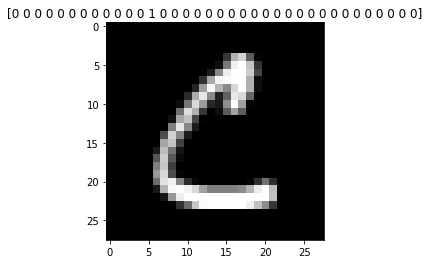

In [ ]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[30000]));

In [ ]:
classes_peso = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_peso[i] = classes_total.max() / classes_total[i]

In [ ]:
classes_peso

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state = 1)

In [ ]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [ ]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Criação da estrutura da rede neural

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
rede_neural = Sequential()

rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(64, activation='relu'))
rede_neural.add(Dense(128, activation='relu'))

rede_neural.add(Dense(36, activation='softmax'))

rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
2 * 2 * 128

512

In [ ]:
rede_neural.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [ ]:
nomes_labels = '0123456789'
nomes_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
nomes_labels = [l for l in nomes_labels]

In [ ]:
print(nomes_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Treinamento da rede neural

In [ ]:
arquivo_modelo = 'manuscrito.model'
epochs = 20
batch_size = 128

In [ ]:
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
len(X_train) // batch_size

2765

In [ ]:
history = rede_neural.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                                            validation_data = (X_test, y_test),
                                            steps_per_epoch = len(X_train) // batch_size,
                                            epochs = epochs,
                                            class_weight = classes_peso,
                                            verbose=1, callbacks=[checkpointer])

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
2765/2765 [==============================] - 170s 51ms/step - loss: 2.1522 - accuracy: 0.8267 - val_loss: 0.2941 - val_accuracy: 0.8781

Epoch 00001: val_loss improved from inf to 0.29407, saving model to manuscrito.model
INFO:tensorflow:Assets written to: manuscrito.model/assets
Epoch 2/20
2765/2765 [==============================] - 141s 51ms/step - loss: 0.9927 - accuracy: 0.8999 - val_loss: 0.2315 - val_accuracy: 0.9029

Epoch 00002: val_loss improved from 0.29407 to 0.23146, saving model to manuscrito.model
INFO:tensorflow:Assets written to: manuscrito.model/assets
Epoch 3/20
2765/2765 [==============================] - 142s 51ms/step - loss: 0.8301 - accuracy: 0.9114 - val_loss: 0.2117 - val_accuracy: 0.9086

Epoch 00003: val_loss improved from 0.23146 to 0.21174, saving model to manuscrito.model
INFO:tensorflow:Assets written to: ma

# Avaliação da rede neural

In [ ]:
X_test.shape

(88490, 28, 28, 1)

In [ ]:
previsoes = rede_neural.predict(X_test, batch_size=batch_size)

In [ ]:
previsoes

array([[3.87733161e-01, 6.02822547e-06, 1.07850055e-05, ...,
        1.79074015e-16, 2.81202972e-07, 1.72498531e-08],
       [2.04929778e-18, 4.55844780e-13, 7.18023189e-13, ...,
        1.79929965e-17, 3.14362646e-17, 3.44433440e-11],
       [4.08143131e-14, 9.76896453e-10, 5.78014026e-11, ...,
        3.15850929e-10, 9.47973477e-10, 2.89753328e-17],
       ...,
       [6.49510741e-01, 2.41285381e-10, 7.94463872e-09, ...,
        3.59113558e-27, 8.53857176e-12, 1.62067049e-14],
       [4.05692336e-26, 2.65365463e-09, 3.39600028e-12, ...,
        9.99528766e-01, 4.66152851e-04, 1.42711043e-11],
       [7.20389295e-08, 9.26884607e-15, 9.12747709e-08, ...,
        2.47530062e-22, 1.27941513e-09, 1.80051718e-09]], dtype=float32)

In [ ]:
previsoes[0]

array([3.87733161e-01, 6.02822547e-06, 1.07850055e-05, 6.81010192e-07,
       1.64792766e-06, 9.32316937e-07, 1.39950353e-05, 2.41151429e-06,
       1.12978032e-05, 5.03346557e-04, 2.98299869e-06, 2.97858128e-06,
       6.65666230e-05, 1.45524647e-03, 2.74637205e-06, 6.82454397e-12,
       1.78253067e-05, 8.04205313e-10, 1.01042806e-10, 2.42099777e-05,
       4.34025367e-08, 6.55186295e-06, 4.99997952e-07, 8.92228927e-05,
       6.07433319e-01, 2.64686649e-04, 2.18381896e-03, 1.41492436e-07,
       1.67890285e-05, 1.63189281e-06, 1.46151127e-04, 1.15205223e-09,
       4.99364852e-08, 1.79074015e-16, 2.81202972e-07, 1.72498531e-08],
      dtype=float32)

In [ ]:
len(previsoes[0])

36

In [ ]:
np.argmax(previsoes[0])

24

In [ ]:
nomes_labels[24]

'O'

In [ ]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.argmax(y_test[0])

24

In [ ]:
nomes_labels[np.argmax(y_test[0])]

'O'

In [ ]:
rede_neural.evaluate(X_test, y_test)

2766/2766 [==============================] - 11s 4ms/step - loss: 0.1664 - accuracy: 0.9397


[0.16637304425239563, 0.9396880865097046]

In [ ]:
print(classification_report(y_test.argmax(axis=1), previsoes.argmax(axis=1), target_names=nomes_labels))

              precision    recall  f1-score   support

           0       0.33      0.79      0.46      1381
           1       0.95      1.00      0.97      1575
           2       0.86      0.98      0.91      1398
           3       0.95      0.99      0.97      1428
           4       0.87      0.98      0.92      1365
           5       0.56      0.96      0.71      1263
           6       0.90      0.99      0.94      1375
           7       0.95      0.99      0.97      1459
           8       0.92      0.99      0.95      1365
           9       0.94      0.99      0.96      1392
           A       1.00      0.98      0.99      2774
           B       0.98      0.98      0.98      1734
           C       0.99      0.98      0.99      4682
           D       0.93      0.97      0.95      2027
           E       1.00      0.98      0.99      2288
           F       0.92      1.00      0.96       232
           G       0.98      0.90      0.94      1152
           H       0.98    

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

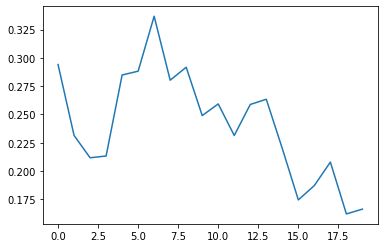

In [ ]:
plt.plot(history.history['val_loss']);

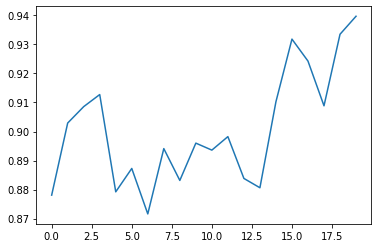

In [ ]:
plt.plot(history.history['val_accuracy']);

# Salvando o modelo no Google Drive

In [ ]:
rede_neural.save('rede_neural', save_format='h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp rede_neural /content/drive/MyDrive/Cursos\ -\ recursos/OCR\ com\ Python/Modelos/rede_neural

# Teste com imagens

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
rede_neural_carregada = load_model('/content/drive/MyDrive/Cursos - recursos/OCR com Python/Modelos/rede_neural')

In [ ]:
rede_neural_carregada

In [ ]:
rede_neural_carregada.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('letra-m.jpg')
cv2_imshow(img)

In [ ]:
img.shape

(30, 30, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

In [ ]:
cv2_imshow(gray)

In [ ]:
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(thresh)

In [ ]:
val

137.0

In [ ]:
thresh.shape

(30, 30)

In [ ]:
img = cv2.resize(thresh, (28, 28))
cv2_imshow(img)

In [ ]:
img.shape

(28, 28)

In [ ]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [ ]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [ ]:
previsao = rede_neural_carregada.predict(img)

In [ ]:
previsao

array([[2.0062606e-11, 5.9469542e-08, 1.1156085e-12, 2.1885607e-18,
        6.0503743e-07, 3.5318585e-11, 2.6769094e-09, 3.3855621e-10,
        1.2069429e-10, 4.0685136e-10, 4.5820461e-06, 2.7295812e-13,
        1.1984650e-09, 5.9589644e-07, 1.8497792e-09, 5.7600851e-19,
        7.6366227e-08, 9.8061610e-06, 2.1833767e-23, 1.3648869e-12,
        8.5764299e-08, 1.9065893e-11, 9.9934083e-01, 4.2394947e-04,
        3.6781342e-10, 1.7583713e-09, 6.3282934e-11, 4.1675721e-09,
        5.6972357e-08, 1.0581819e-10, 5.4059386e-05, 2.1205576e-15,
        1.6522777e-04, 1.0793455e-09, 8.6997898e-10, 5.7424772e-12]],
      dtype=float32)

In [ ]:
np.argmax(previsao)

22

In [ ]:
nomes_labels[22]

'M'